# Comparision of different classification Algorithms on characters
---
In this module, we are comparing different classification algorithms to classify a dataset of digits available from Kaggle. The algorithms we are considering are - 
- Logistic Regression
- K-Nearest Neighbors
- SVM Classifier
- Perceptron

Each image in the dataset is a 28x28 image. These images are flattened, and hence we have 784 features for each sample. We train the classifiers based on different holdout ratios, and study their effect on the testing and error ratio of the prediction. 

To reduce the number of features, we use Principle Component Analysis to get the top 35 features with the highest variance. We then use these features to train our classifier.

We have used the following in-built functions - 
- *svm* from sklearn.svm (SVM Classifier)
- *kneighboursclassifier* from sklearn.neighbours (K-nearest classifier)
- *logisticregression* from sklearn.linear_model (Logistic Regression)
- *perceptron* from sklearn.linear_model (Perceptron)
- *pca* from sklearn.decomposition
- *train_test_split* from sklearn.cross_validation

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,svm,metrics,neighbors,linear_model
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
lines=[line.rstrip('\n') for line in open('train.csv')]
n=len(lines)

X=[]
Y=[]
for i in range(1,n):
    line=lines[i].strip().split(',')
    Y.append(line[0])
    X.append([int(j) for j in line[1:]])
X=np.array(X)
Y=np.array(Y)

The data that we are interested in is made of 28x28 images of digits, let's have a look at the first 16 images, stored in the `images` attribute of the dataset. Nearest interpolation is used to make the images more clear.

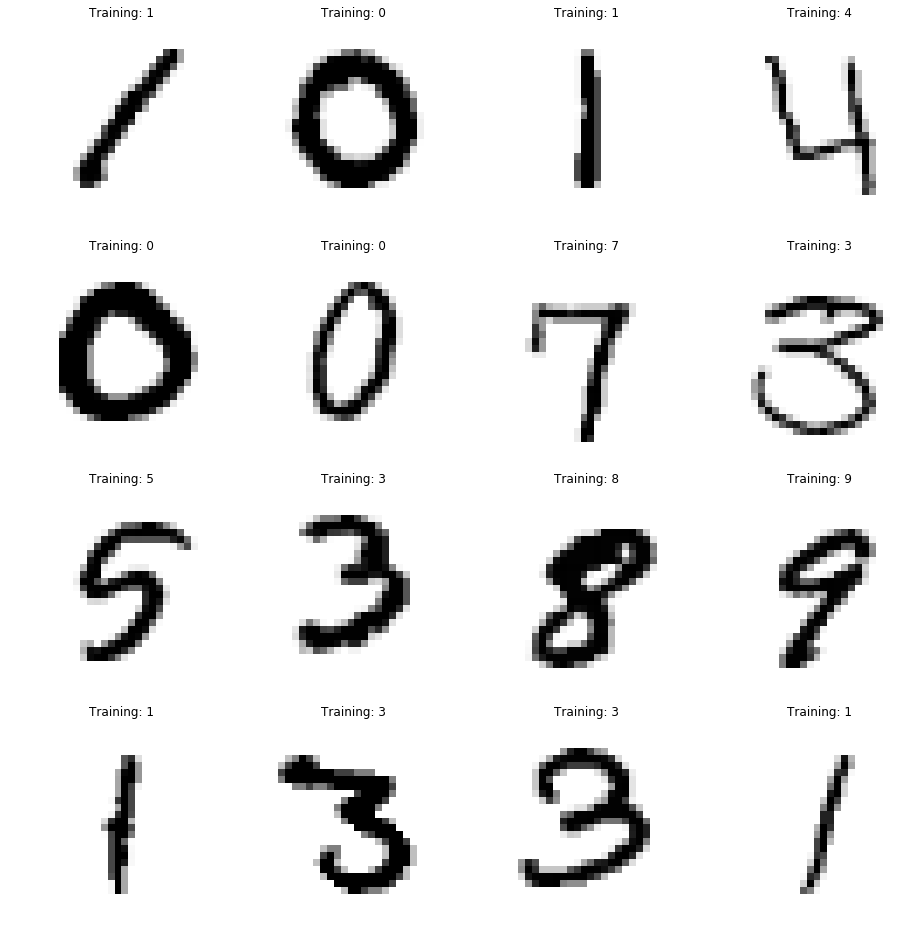

In [3]:
plt.figure(figsize=(16,16))
data=[np.uint8(np.zeros((28,28))) for i in range(16)]
for i in range(16):
    for j in range(784):
        data[i][j//28,j%28]=X[i][j]
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.imshow(data[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %s' % Y[i])
plt.show()

In [4]:
#creating different holdout ratios
holdout=[0.95, 0.90, 0.75, 0.50, 0.1, 0.05]

#we apply the PCA algorithm with 35 features
pca=PCA(n_components=35, whiten=True)
#we train the PCA
pca.fit(X)
#we transform the dataset
X=pca.transform(X)

In [5]:
#we declare the classifiers
classifiers=[("Logistic Regression",linear_model.LogisticRegression()),
             ("K-nearest Neighbours", neighbors.KNeighborsClassifier()),
             ("SV Classifier",svm.SVC(gamma=0.001)),
             ("Perceptron",linear_model.Perceptron())]

In [6]:
#x-axis for plotting performance for different holdouts
xx=1. - np.array(holdout)

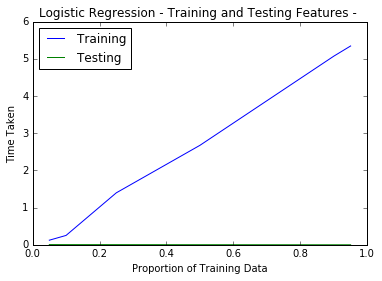

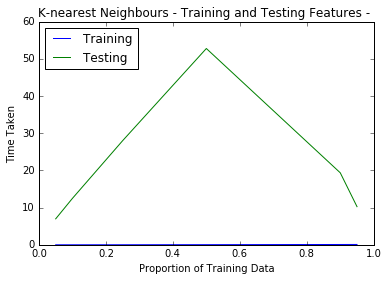

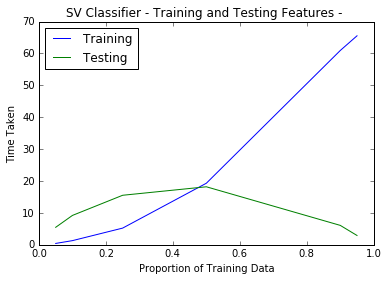

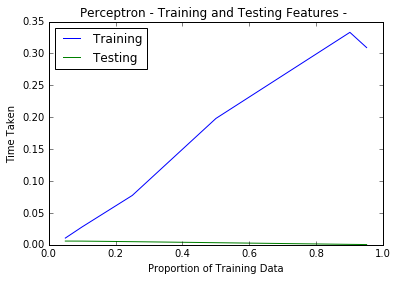

In [7]:
errors={name:list() for name,clf in classifiers} #y-axis for plotting performance for different holdouts
conf_matrices={name:'' for name,clf in classifiers}

#calculations
for name, clf in classifiers:
    rng = np.random.RandomState(42) #for random split of dataset into train and test 
    t_train=[]
    t_test=[]
    plt.figure(figsize=(6,4))
    for i in holdout:
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=i, random_state=rng)
        start=time.time()
        clf.fit(X_train,Y_train) # we train the dataset
        t_train.append(time.time()-start)
        
        start=time.time()
        Y_pred=clf.predict(X_test) #making predictions
        t_test.append(time.time()-start)
        
        errors[name].append(1.-np.mean(Y_pred == Y_test))
        
        if i==0.05:
            conf_matrices[name]=metrics.confusion_matrix(Y_test, Y_pred)
    
    plt.title(name+" - Training and Testing Features - ")
    plt.plot(xx,t_train,label="Training")
    plt.plot(xx,t_test, label="Testing")
    plt.legend(loc="upper left")
    plt.xlabel("Proportion of Training Data")
    plt.ylabel("Time Taken")

In [8]:
for x in conf_matrices.keys():
    print("Confusion Matrix for %s - \n%s\n" %(x,conf_matrices[x]))

Confusion Matrix for SV Classifier - 
[[199   0   0   0   0   0   0   0   0   1]
 [  0 220   0   0   1   3   0   0   1   0]
 [  1   4 183   2   1   0   5   6   3   0]
 [  3   3   7 202   1   5   1   1   7   2]
 [  1   2   0   0 188   0   2   0   0  12]
 [  4   3   1   7   4 162   5   1   3   0]
 [  1   0   0   0   3   5 200   0   0   0]
 [  0   4   6   0   1   1   0 215   0   2]
 [  0   3   2   7   1   5   1   0 166   2]
 [  0   0   1   4  12   2   0   4   3 192]]

Confusion Matrix for Logistic Regression - 
[[198   0   0   0   0   0   0   1   0   1]
 [  0 218   1   1   0   2   0   1   2   0]
 [  1   4 174   5   3   0   5   7   5   1]
 [  4   4   7 195   1   8   3   1   5   4]
 [  1   2   2   0 180   1   3   1   0  15]
 [  3   5   2   5   3 150   7   3  11   1]
 [  1   1   0   0   1   5 200   1   0   0]
 [  2   3   7   1   1   1   0 209   0   5]
 [  0   4   2   8   2   5   2   0 162   2]
 [  0   1   1   4  14   2   0   8   3 185]]

Confusion Matrix for K-nearest Neighbours - 
[[198   0

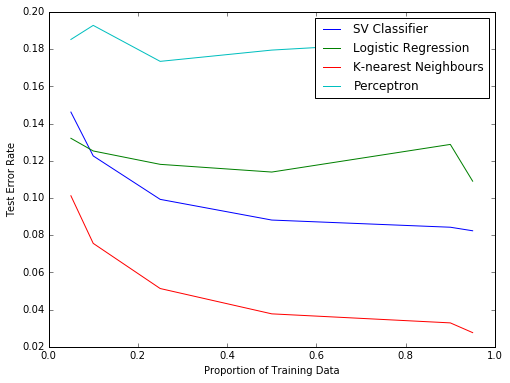

In [9]:
plt.figure(figsize=(8,6))
for x in errors.keys():
    plt.plot(xx,errors[x],label=x)
plt.legend(loc="upper right")
plt.xlabel("Proportion of Training Data")
plt.ylabel("Test Error Rate")
plt.show()

## Conclusion
---
- In logistic regression and Perceptron the testing time is very low.
- Testing time in knn increases until size of training and test set is equal, after that it decreases
- Testing time in SVM is between logistic regression, Perceptron and knn
- As far as test error rate is considered knn has th minimum error rate, then SVM, then Logistic Regression and then Perceptron. 